['Tamanho da Lista', 'Tipo de Lista', 'Bubble Sort - Tempo (ms)', 'Bubble Sort - comparacoes', 'Bubble Sort - Trocas', 'Selection Sort - Tempo (ms)', 'Selection Sort - comparacoes', 'Selection Sort - Trocas', 'Insertion Sort - Tempo (ms)', 'Insertion Sort - comparacoes', 'Insertion Sort - Trocas', 'Merge Sort - Tempo (ms)', 'Merge Sort - comparacoes', 'Merge Sort - Trocas', 'Quick Sort - Tempo (ms)', 'Quick Sort - comparacoes', 'Quick Sort - Trocas', 'Heap Sort - Tempo (ms)', 'Heap Sort - comparacoes', 'Heap Sort - Trocas']


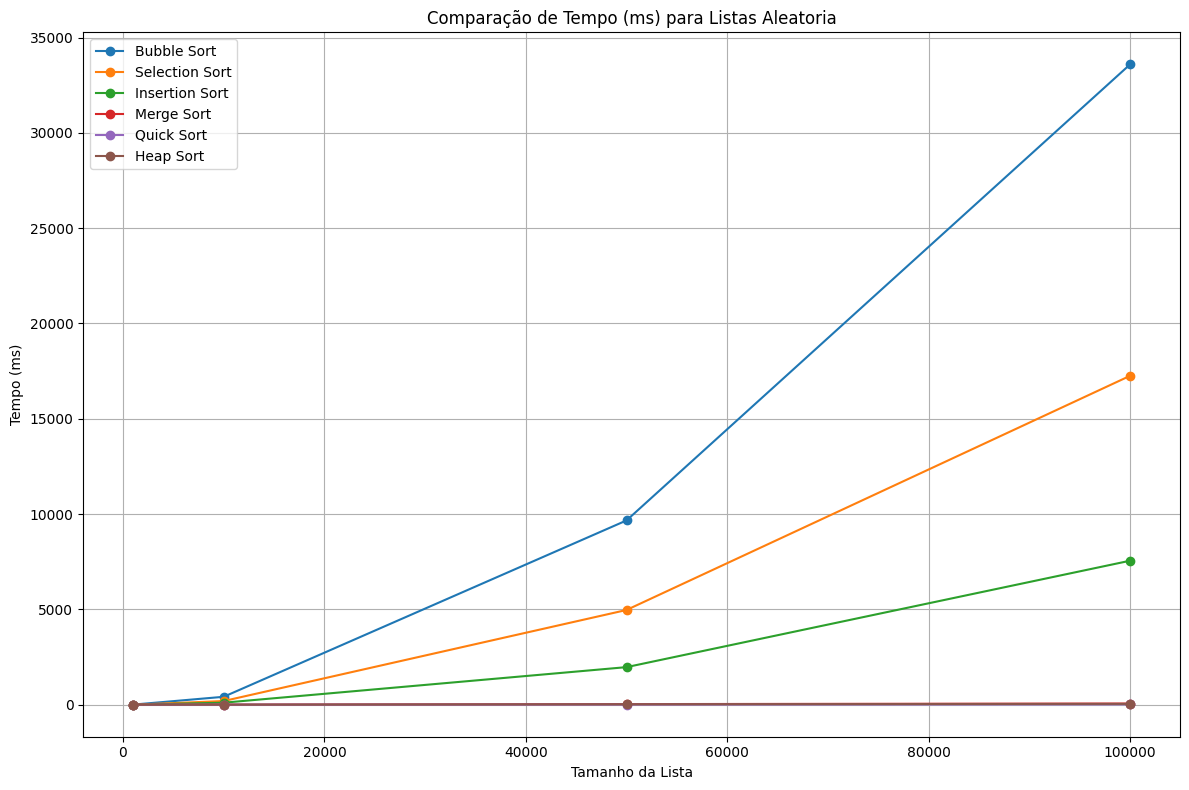

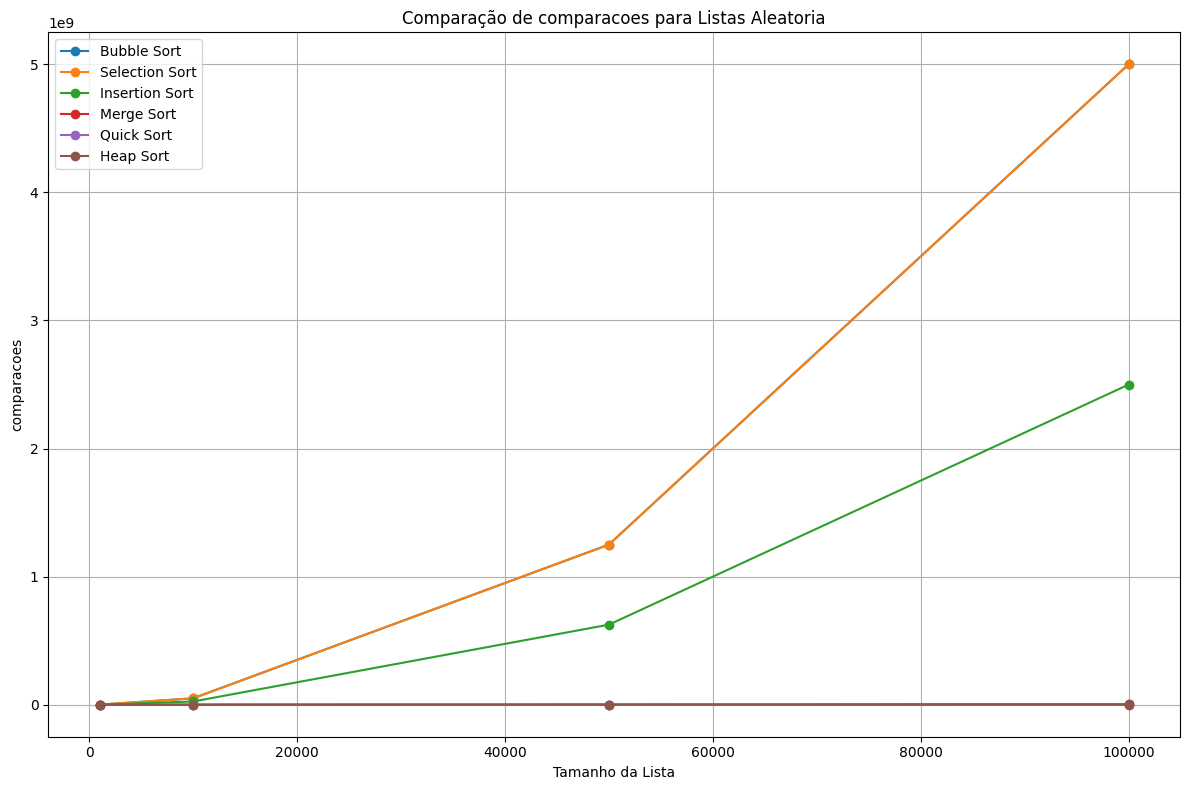

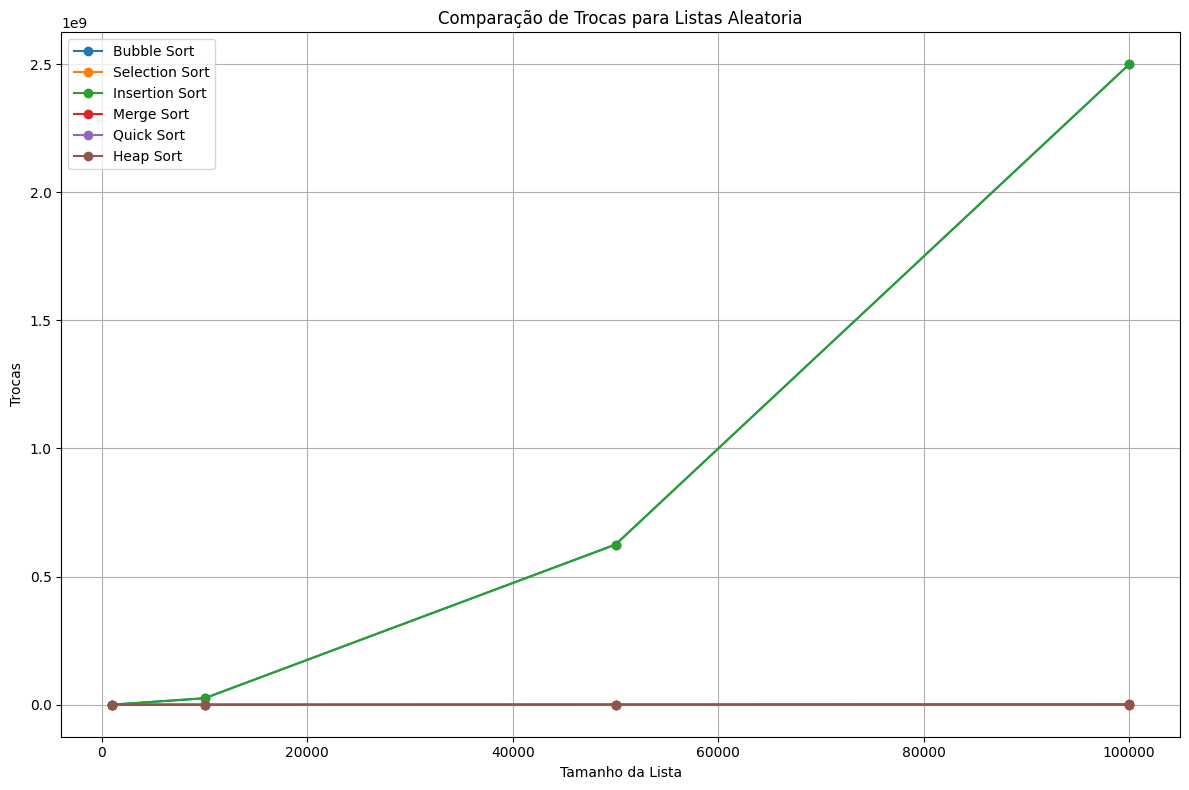

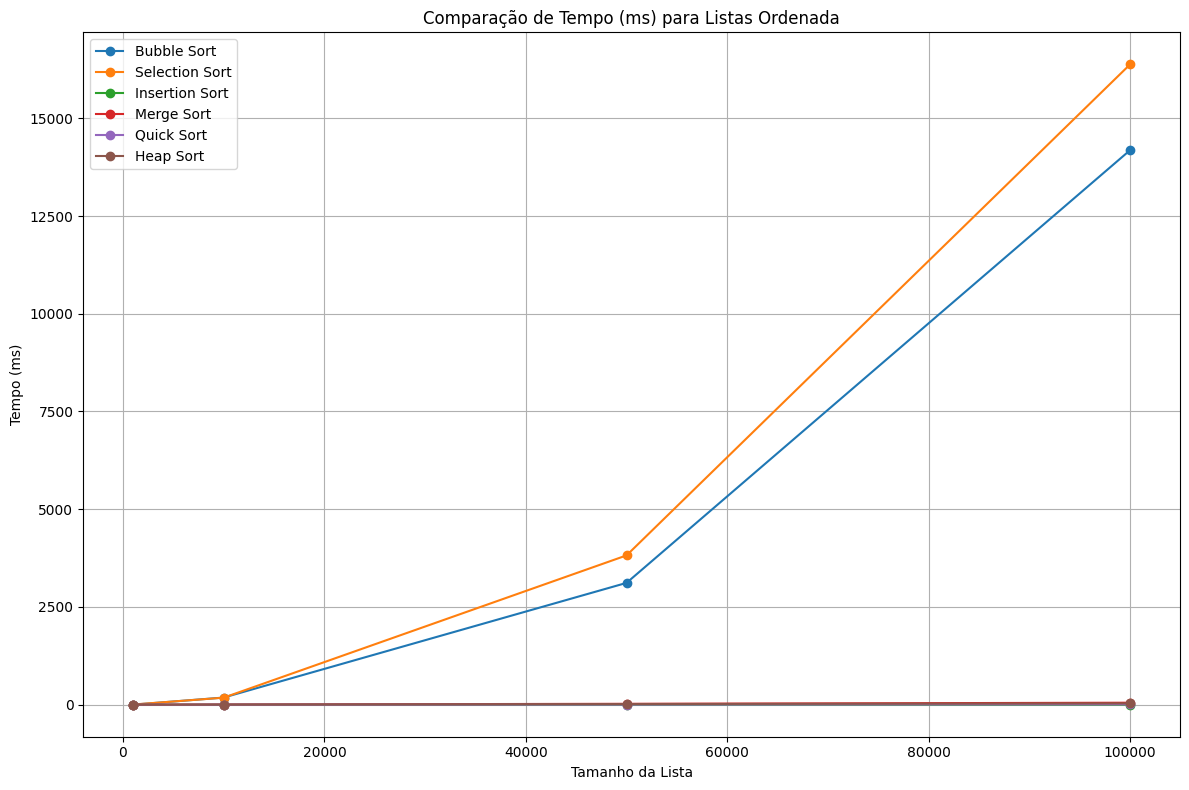

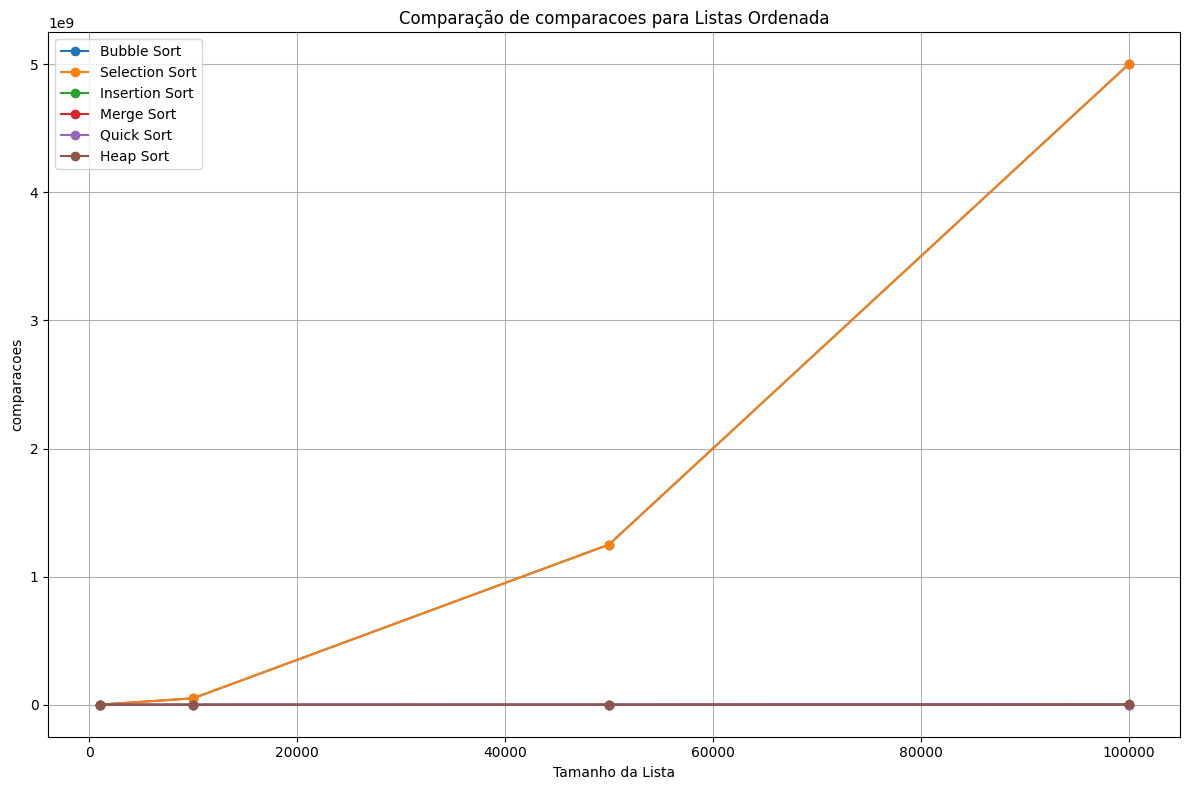

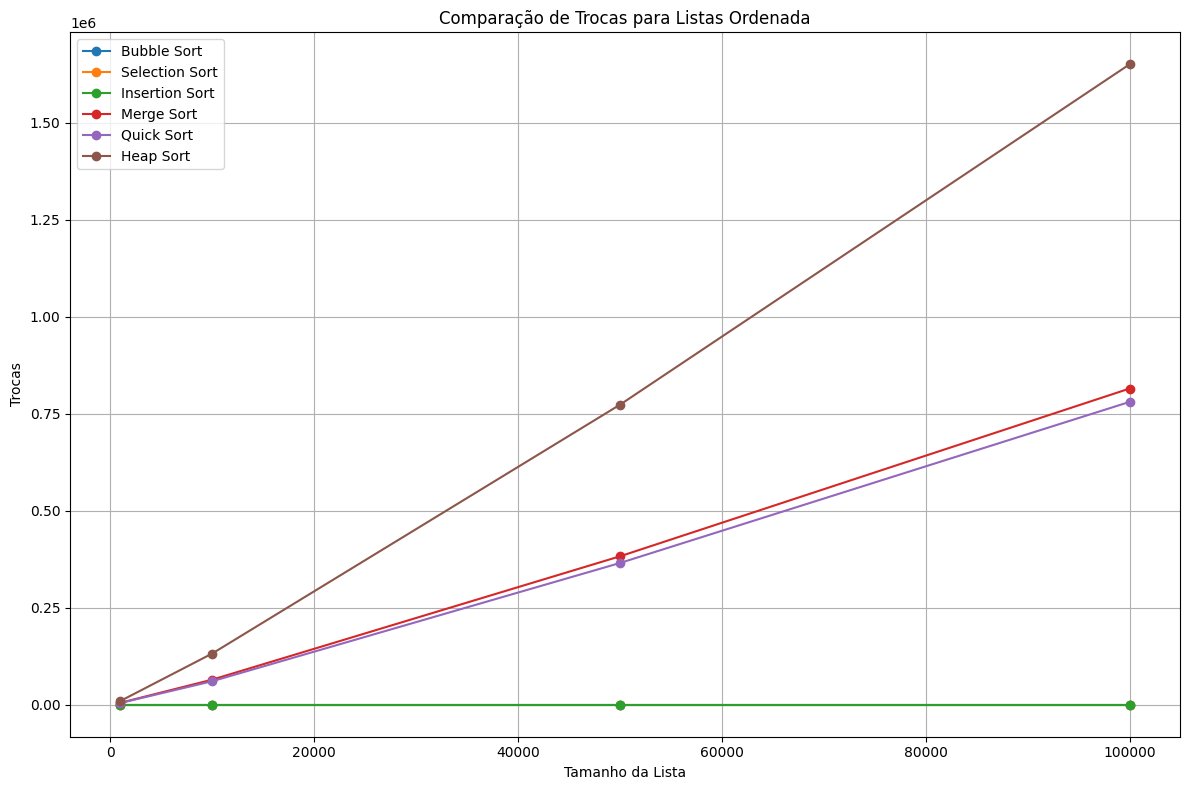

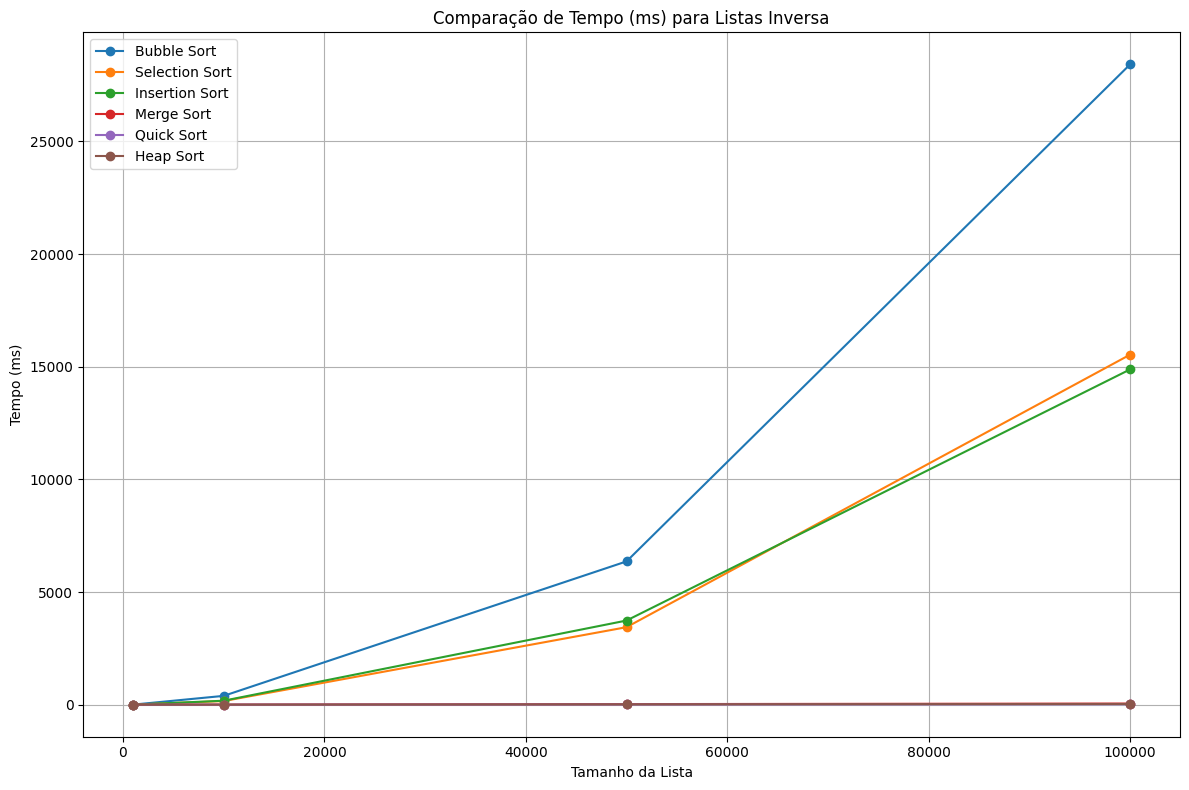

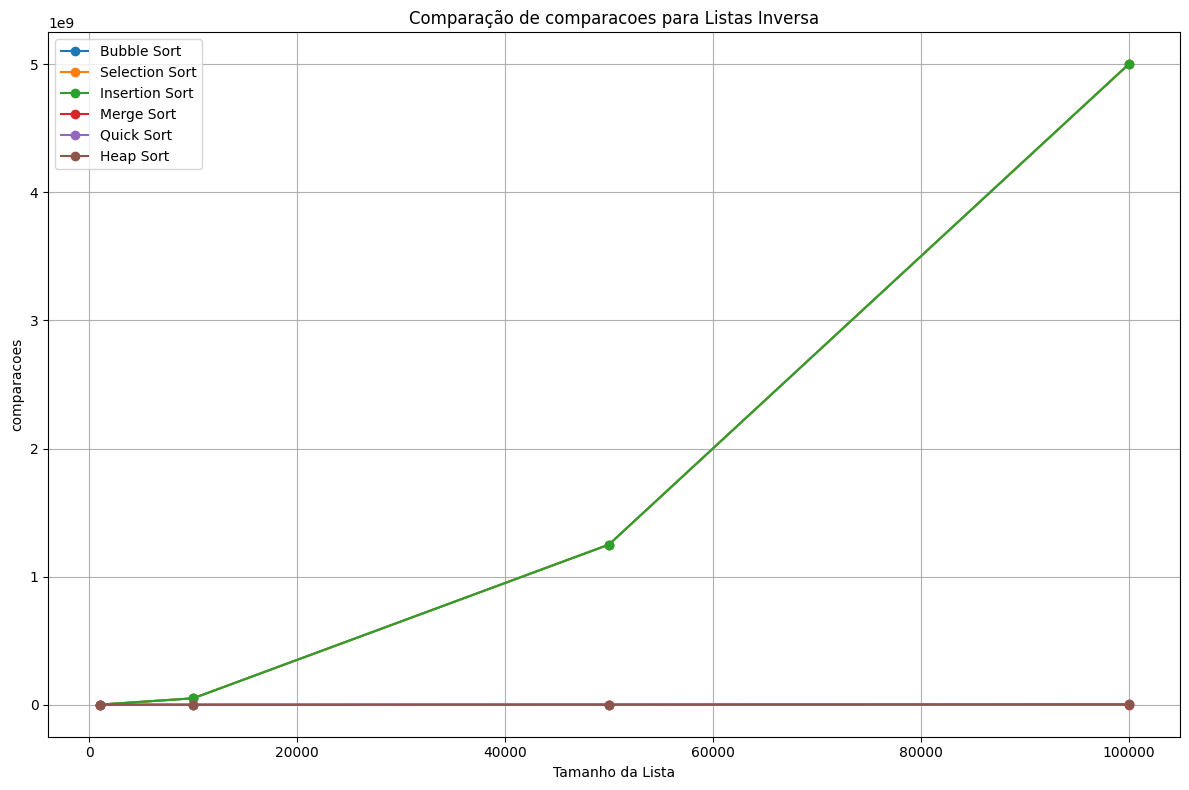

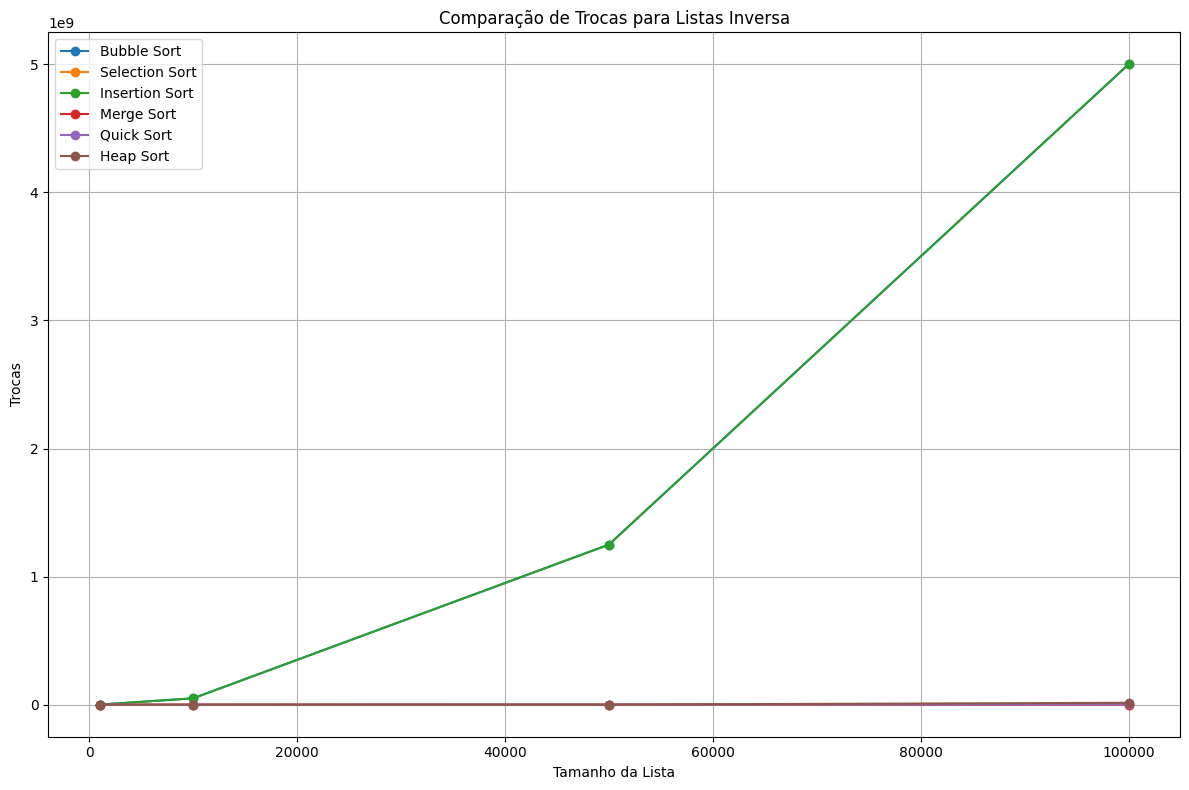

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Caminho do arquivo CSV
arquivo_csv = 'algorithms_comparison.csv'

# Carregar os dados no pandas com ISO-8859-1 e delimitador ';'
df = pd.read_csv(arquivo_csv, encoding='ISO-8859-1', delimiter=';')

# Removendo espaços em branco nos nomes das colunas
df.columns = df.columns.str.strip().str.replace('  ', ' ')  # Substituir múltiplos espaços por um único

print(df.columns.tolist())

# Separar os dados por algoritmo
algoritmos = ['Bubble Sort', 'Selection Sort', 'Insertion Sort', 'Merge Sort', 'Quick Sort', 'Heap Sort']

# Métricas para plotar
metricas = ['Tempo (ms)', 'comparacoes', 'Trocas']

# Função para plotar gráficos
def plotar_graficos(df, tipo_lista):
    for metrica in metricas:
        plt.figure(figsize=(12, 8))
        for algoritmo in algoritmos:
            coluna = f'{algoritmo} - {metrica}'
            plt.plot(df['Tamanho da Lista'], df[coluna], marker='o', label=algoritmo)
        plt.title(f'Comparação de {metrica} para Listas {tipo_lista}')
        plt.xlabel('Tamanho da Lista')
        plt.ylabel(metrica)
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

# Tipos de lista para analisar
tipos_de_lista = df['Tipo de Lista'].unique()

# Loop para plotar gráficos para cada tipo de lista
for tipo in tipos_de_lista:
    df_tipo = df[df['Tipo de Lista'] == tipo]
    plotar_graficos(df_tipo, tipo)


In [30]:
def merge_inv(L, R, A, k, kk, B, t):
    L[k] = float('inf')
    R[0] = float('inf')
    il = 0
    ir = 0
    for j in range(B[t-1] + 1, B[t] + 1):
        if L[il] <= R[kk - 1 - ir]:
            A[j] = L[il]
            il += 1
        else:
            A[j] = R[kk - 1 - ir]
            ir += 1

def merge_m(A, p, q, r, B):
    n1 = B[q] - B[p]
    n2 = B[r] - B[q]
    L = [0] * (n1 + 1)
    R = [0] * (n2 + 1)
    for i in range(n1):
        L[i] = A[B[p] + i + 1]
    for i in range(n2):
        R[i] = A[B[q] + i + 1]
    L[n1] = float('inf')
    R[n2] = float('inf')
    i = 0
    j = 0
    for k in range(n1 + n2):
        if L[i] <= R[j]:
            A[B[p] + k + 1] = L[i]
            i += 1
        else:
            A[B[p] + k + 1] = R[j]
            j += 1

def sort(A, n):
    B = [-1] * n
    L = [0] * n
    R = [0] * n
    t = 0
    inc = float('-inf')
    dec = float('inf')
    k = 0
    kk = 1
    for i in range(n - 1):
        if inc <= A[i] <= dec:
            if A[i] <= A[i + 1]:
                inc = A[i]
                L[k] = A[i]
                k += 1
            else:
                dec = A[i]
                R[kk] = A[i]
                kk += 1
        else:
            if inc <= A[i]:
                inc = A[i]
                L[k] = A[i]
                k += 1
            elif dec >= A[i]:
                dec = A[i]
                R[kk] = A[i]
                kk += 1
            else:
                inc = float('-inf')
                dec = float('inf')
                t += 1
                B[t] = i - 1
                merge_inv(L, R, A, k, kk, B, t)
                k = 0
                kk = 1
                i -= 1
    t += 1
    B[t] = n - 2
    if A[n - 1] >= L[k - 1]:
        L[k] = A[n - 1]
        k += 1
        B[t] = n - 1
    elif A[n - 1] <= R[kk - 1]:
        R[kk] = A[n - 1]
        kk += 1
        B[t] = n - 1
    merge_inv(L, R, A, k, kk, B, t)
    k = t
    if B[t] == n - 2:
        B[t + 1] = n - 1
        k += 1
    while k > 1:
        t = 0
        for i in range(0, k - 1, 2):
            merge_m(A, i, i + 1, i + 2, B)
            t += 1
            B[t] = B[i + 2]
        B[t + 1] = n - 1
        k = (k + 1) // 2
    return A

# Exemplo de uso
A = [3, 10, 7, 4, 6, 1, 5, 8, 9, 2, 12, 11]
n = len(A)
sorted_A = sort(A, n)
print(sorted_A)


[1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 12]


In [28]:
def merge_inv(L, R, A, k, kk, B, t):
    L[k] = float('inf')
    R[kk] = float('inf')
    il = 0
    ir = 0
    for j in range(B[t-1] + 1, B[t] + 1):
        if L[il] <= R[ir]:
            A[j] = L[il]
            il += 1
        else:
            A[j] = R[ir]
            ir += 1

def merge_m(A, p, q, r, B):
    n1 = B[q] - B[p]
    n2 = B[r] - B[q]
    L = [0] * (n1 + 1)
    R = [0] * (n2 + 1)
    for i in range(n1):
        L[i] = A[B[p] + i + 1]
    for i in range(n2):
        R[i] = A[B[q] + i + 1]
    L[n1] = float('inf')
    R[n2] = float('inf')
    i = 0
    j = 0
    for k in range(n1 + n2):
        if L[i] <= R[j]:
            A[B[p] + k + 1] = L[i]
            i += 1
        else:
            A[B[p] + k + 1] = R[j]
            j += 1

def sort(A, n):
    B = [-1] * n
    L = [0] * n
    R = [0] * n
    t = 0
    inc = float('-inf')
    dec = float('inf')
    k = 0
    kk = 1
    for i in range(n - 1):
        if inc <= A[i] <= dec:
            if A[i] <= A[i + 1]:
                inc = A[i]
                L[k] = A[i]
                k += 1
            else:
                dec = A[i]
                R[kk] = A[i]
                kk += 1
        else:
            if inc <= A[i]:
                inc = A[i]
                L[k] = A[i]
                k += 1
            elif dec >= A[i]:
                dec = A[i]
                R[kk] = A[i]
                kk += 1
            else:
                inc = float('-inf')
                dec = float('inf')
                t += 1
                B[t] = i - 1
                merge_inv(L, R, A, k, kk, B, t)
                k = 0
                kk = 1
                i -= 1
    t += 1
    B[t] = n - 2
    if A[n - 1] >= L[k - 1]:
        L[k] = A[n - 1]
        k += 1
        B[t] = n - 1
    elif A[n - 1] <= R[kk - 1]:
        R[kk] = A[n - 1]
        kk += 1
        B[t] = n - 1
    merge_inv(L, R, A, k, kk, B, t)
    k = t
    if B[t] == n - 2:
        B[t + 1] = n - 1
        k += 1
    while k > 1:
        t = 0
        for i in range(0, k - 1, 2):
            merge_m(A, B[i], B[i + 1], B[i + 2], B)
            t += 1
            B[t] = B[i + 2]
        B[t + 1] = n - 1
        k = (k + 1) // 2
    return A

# Exemplo de uso
A = [3, 10, 7, 4, 6, 1, 5, 8, 9, 2, 12, 11]
n = len(A)
sorted_A = sort(A, n)
print(sorted_A)


Sorted array: [3, 6, 4, 7, 10, 1, 5, 8, 9, 2, 12, 11]
